In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [ ]:

stock_data = yf.download("TSLA", start="2015-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data  = data[['Close']]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(stock_data)

In [ ]:



def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+ time_steps])
        y.append(data[i+ time_steps])
    return np.array(X), np.array(y)

time_steps = 60 # Use past 60 days for prediction
X_train, y_train = create_sequences(scaled_data,time_steps)




model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(60,1)), # First LSTM layer
    Dropout(0.2), # Dropout to prevent overfitting
    LSTM(32, return_sequences=False), # Second LSTM layer
    Dense(25, activation="relu"), # Fully connected layer
    Dense(1) # Output layer (1 neuron for predicting stock price)
])
model.compile(optimizer='adam', loss='mae')


model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,)










/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - loss: 0.0723 - val_loss: 0.0388
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0152 - val_loss: 0.0315
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0169 - val_loss: 0.0301
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0144 - val_loss: 0.0327
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0141 - val_loss: 0.0274
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0136 - val_loss: 0.0277
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0116 - val_loss: 0.0247
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0125 - val_loss: 0.0277
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0139 - val_loss: 0.0223
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.0125 - val_loss: 0.0211
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0114 - val_loss: 0.0213
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/ste

In [ ]:
import datetime


last_60_days = (scaled_data[-60:])
future_predictions = []

for _ in range(365):
    next_day_price = model.predict(last_60_days.reshape(1, 60, 1))


    future_predictions.append(next_day_price[0, 0])
    last_60_days = np.append(last_60_days[1:], next_day_price).reshape(60, 1)


future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━

In [ ]:
start_date = stock_data.index[-1] + datetime.timedelta(days=1)
future_dates = [start_date + datetime.timedelta(days=i) for i in range(365)]

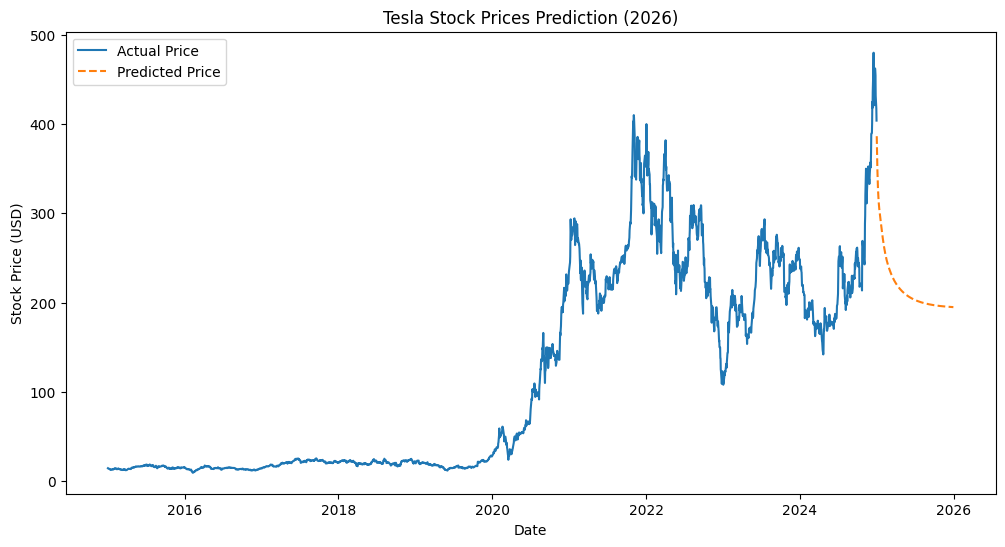

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label="Actual Price")
plt.plot(future_dates, future_predictions, label="Predicted Price", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Prices Prediction (2026)")
plt.legend()
plt.show()
